In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For implement Kmeans
from copy import deepcopy
# For cost function
from scipy.spatial import distance

plt.style.use("ggplot")

In [2]:
data = pd.read_csv("./datasets/data_noah.csv", usecols=["x", "y"])

In [3]:
data.head()
x = data["x"].values
y = data["y"].values
Noah = np.array(list(zip(x, y)))

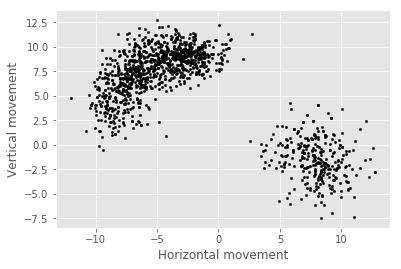

In [4]:
# Plotting values
plt.xlabel("Horizontal movement")
plt.ylabel("Vertical movement")
plt.scatter(x, y,  c="black", s=5)

In [5]:
# Calculate Euclidean distance
def EuclideanDist(a, b, ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [6]:
# Number  of clusters
k = 3
# Pick first three pair of (x, y) as three centroids
center = Noah[:k]

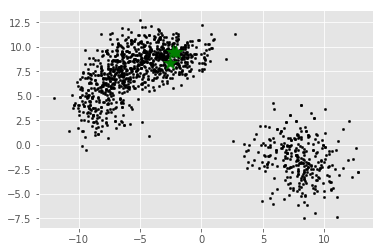

In [7]:
# Plotting along with the value of centroids
plt.scatter(x, y, c="black", s=5)
for i in range(len(center)):
    plt.scatter(center[i][0], center[i][1], c="g", s=200, marker="*")

In [8]:
# Store old centroid when it updates
center_old = np.zeros(center.shape)
# Cluster labels: 3 clusters (0, 1, 2)
clusters = np.zeros(len(Noah))
# Error function
err = EuclideanDist(center, center_old, None)
# Loop will run till the err becomes 0
while err != 0:
    # Assign values to its closest centroid
    for i in range(len(Noah)):
        distances = EuclideanDist(Noah[i], center)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Store the old centroid value
    center_old = deepcopy(center)
    for i in range(k):
        points = [Noah[j] for j in range(len(Noah)) if clusters[j] == i]
        center[i] = np.mean(points, axis=0)
    err = EuclideanDist(center, center_old, None)

Text(0.5,1,'Kmeans result')

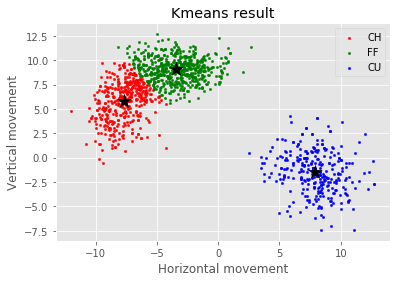

In [9]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
points = None
for i in range(k):
        points = np.array([Noah[j] for j in range(len(Noah)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i], label=colors[i])
ax.scatter(center[:, 0], center[:, 1], marker="*", s=200, c="black")
ax.legend(["CH", "FF", "CU"])
plt.xlabel("Horizontal movement")
plt.ylabel("Vertical movement")
plt.title("Kmeans result")

In [10]:
# Save result
fig.savefig("Kmeans_result.png")